In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


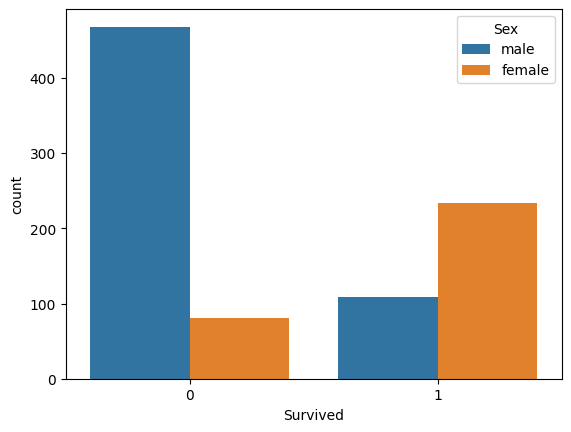

In [ ]:
sns.countplot(x='Survived', data=train, hue='Sex')

plt.show()

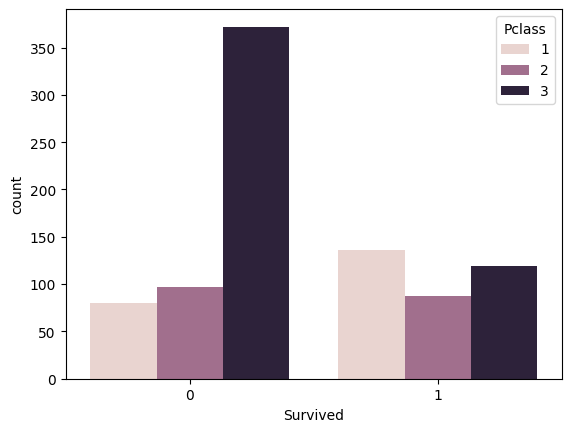

In [ ]:
sns.countplot(x='Survived', data=train, hue='Pclass')

plt.show()

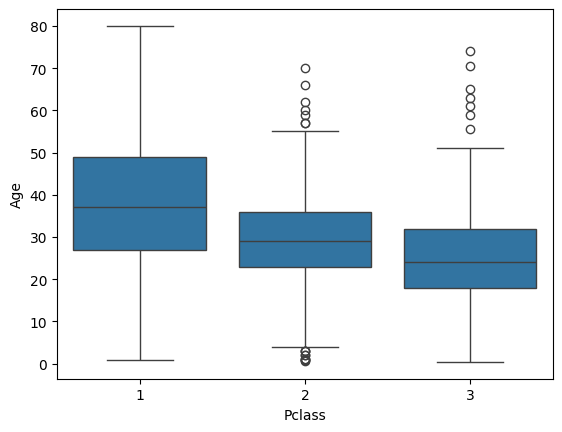

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train)

plt.show()

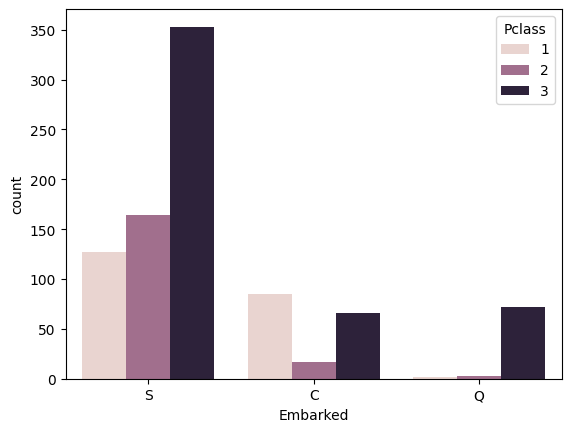

In [ ]:
sns.countplot(x='Embarked', hue='Pclass', data=train)

plt.show()

In [ ]:
pd.crosstab(train['Ticket'], train['Pclass'])

Pclass,1,2,3
Ticket,,,
110152,3,0,0
110413,3,0,0
110465,2,0,0
110564,1,0,0
110813,1,0,0
...,...,...,...
W./C. 6608,0,0,4
W./C. 6609,0,0,1
W.E.P. 5734,1,0,0


In [ ]:
train.groupby('Pclass')['Ticket'].nunique()

,Ticket
Pclass,
1,147
2,140
3,394


In [ ]:
train['Ticket_group_size'] = train.groupby('Ticket')['Ticket'].transform('count')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_group_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


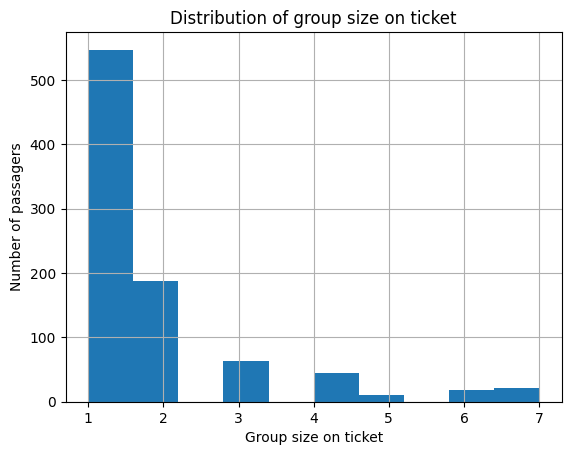

In [ ]:
train['Ticket_group_size'].hist(bins=10)

plt.xlabel('Group size on ticket')
plt.ylabel('Number of passagers')
plt.title('Distribution of group size on ticket')

plt.show()

<Axes: >

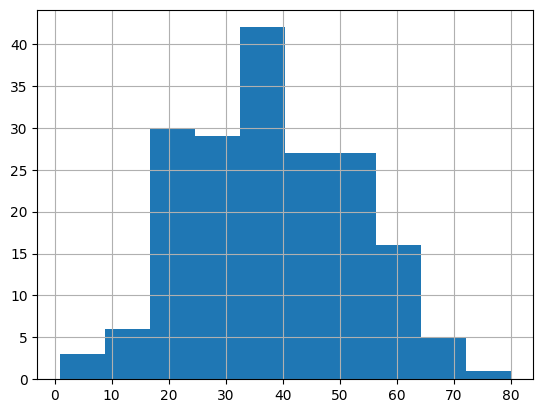

In [ ]:
train[(train['Pclass']==1)]['Age'].hist()

<Axes: >

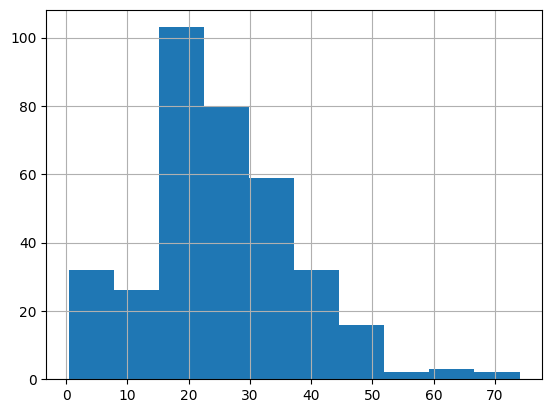

In [ ]:
train[(train['Pclass']==3)]['Age'].hist()

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
def add_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    return int(train[train['Pclass']== Pclass]['Age'].mean())
  else:
    return Age


In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(add_age, axis = 1)

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train.drop('Cabin', axis=1, inplace=True)

In [ ]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [ ]:
train['Embarked'].mode()[0]

'S'

Feature Engineering

In [ ]:
def combine(df,col1,col2):
  train['Family'] = df[col1] + df[col2]

  return df

In [ ]:
train = combine(train,'SibSp','Parch')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_group_size,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


In [ ]:
train['Family'].value_counts()

,count
Family,
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


<Axes: >

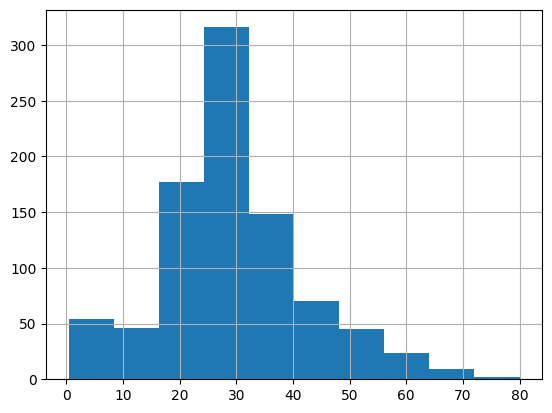

In [ ]:
train['Age'].hist()

In [ ]:
def process_age(df, cut_points, label_names):
  df['Age'] = df['Age'].fillna(-0.5)
  df['Age_categories'] = pd.cut(df['Age'], bins = cut_points, labels = label_names)

  return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

In [ ]:
train = process_age(train, cut_points, label_names)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_group_size,Family,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,Young Adult


In [ ]:
def create_dummies(df, column_name):
  dummies = pd.get_dummies(df[column_name], prefix = column_name)
  df = pd.concat([df, dummies], axis = 1)

  return df

In [ ]:
for col in ['Sex', 'Embarked', 'Age_categories', 'Pclass']:
  train = create_dummies(train, col)

In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Age_categories', 'Pclass', 'Embarked'], axis = 1, inplace = True)

In [ ]:
train.shape

(891, 22)

In [ ]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket_group_size',
       'Family', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [ ]:
for col in train.columns:
  print(col)

Survived
Age
SibSp
Parch
Fare
Ticket_group_size
Family
Sex_female
Sex_male
Embarked_C
Embarked_Q
Embarked_S
Age_categories_Missing
Age_categories_Infant
Age_categories_Child
Age_categories_Teenager
Age_categories_Young Adult
Age_categories_Adult
Age_categories_Senior
Pclass_1
Pclass_2
Pclass_3


In [ ]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Ticket_group_size,Family,Sex_female,Sex_male,Embarked_C,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,1,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,1,38.0,1,0,71.2833,1,1,True,False,True,...,False,False,False,False,False,True,False,True,False,False
2,1,26.0,0,0,7.9250,1,0,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1,35.0,1,0,53.1000,2,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False
4,0,35.0,0,0,8.0500,1,0,False,True,False,...,False,False,False,False,True,False,False,False,False,True


Split Data

In [ ]:
X = train.drop(columns='Survived')
y = train['Survived']

In [ ]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Ticket_group_size,Family,Sex_female,Sex_male,Embarked_C,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,1,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,1,38.0,1,0,71.2833,1,1,True,False,True,...,False,False,False,False,False,True,False,True,False,False
2,1,26.0,0,0,7.9250,1,0,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1,35.0,1,0,53.1000,2,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False
4,0,35.0,0,0,8.0500,1,0,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.2, random_state=42)

Scaling

In [ ]:
sc = StandardScaler()

In [ ]:
X_sc = X.copy()
X_sc[['Age', 'Fare', 'Ticket_group_size']] = sc.fit_transform(
    X[['Age', 'Fare', 'Ticket_group_size']])


In [ ]:
X_train_sc, X_test_sc, y_train,y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

In [ ]:
X_sc.head()

,Age,SibSp,Parch,Fare,Ticket_group_size,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3
0,-0.549259,1,0,-0.502445,-0.579162,1,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,0.662445,1,0,0.786845,-0.579162,1,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,-0.246333,0,0,-0.488854,-0.579162,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.435251,1,0,0.420730,0.155928,1,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,0.435251,0,0,-0.486337,-0.579162,0,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(lr, X, y, cv = 10)
print(scores)
print(np.mean(scores))

[0.8        0.82022472 0.7752809  0.85393258 0.80898876 0.7752809
 0.79775281 0.79775281 0.85393258 0.85393258]
0.8137078651685394


In [ ]:
lr_sc = LogisticRegression()

lr_sc.fit(X_train_sc, y_train)


LogisticRegression()

In [ ]:
y_pred_lr_sc = lr_sc.predict(X_test_sc)

In [ ]:
scores = cross_val_score(lr_sc,X_sc,y, cv=10)
print(scores)
print(np.mean(scores))

[0.8        0.82022472 0.7752809  0.85393258 0.80898876 0.7752809
 0.79775281 0.80898876 0.85393258 0.86516854]
0.8159550561797753


Preprocessing Test set

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.shape

(418, 11)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
pd.crosstab(test['Ticket'], test['Pclass'])

Pclass,1,2,3
Ticket,,,
110469,1,0,0
110489,1,0,0
110813,1,0,0
111163,1,0,0
112051,1,0,0
...,...,...,...
W./C. 14260,0,1,0
W./C. 14266,0,1,0
W./C. 6607,0,0,2


In [ ]:
test.groupby('Pclass')['Ticket'].nunique()

,Ticket
Pclass,
1,83
2,80
3,200


In [ ]:
test['Ticket_group_size'] = test.groupby('Ticket')['Ticket'].transform('count')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_group_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
def add_age_test(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    return int(test[test['Pclass']== Pclass]['Age'].mean())
  else:
    return Age


In [ ]:
test['Age'] = test[['Age', 'Pclass']].apply(add_age_test, axis = 1)

In [ ]:
test.drop('Cabin',axis=1, inplace=True)

In [ ]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [ ]:
test['Fare'].mode()[0]

np.float64(7.75)

In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


Feature Engineering

In [ ]:
def combine_test(df,col1,col2):
  test['Family'] = df[col1] + df[col2]

  return df

In [ ]:
test = combine_test(test,'SibSp','Parch')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_group_size,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,2


In [ ]:
test['Family'].value_counts()

,count
Family,
0,253
1,74
2,57
3,14
4,7
10,4
6,4
5,3
7,2


<Axes: >

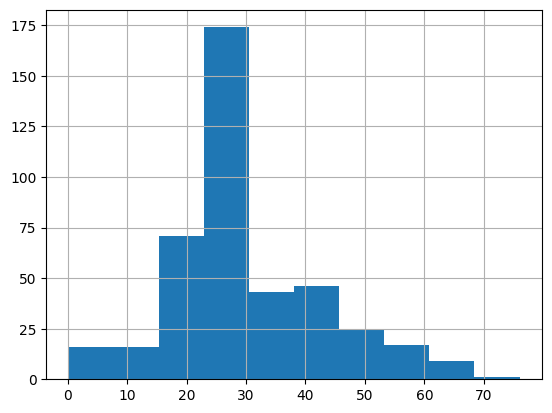

In [ ]:
test['Age'].hist()

In [ ]:
test = process_age(test,cut_points,label_names)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_group_size,Family,Age_categories
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,1,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,2,Young Adult


In [ ]:
for col in ['Sex', 'Embarked', 'Age_categories', 'Pclass']:
  test = create_dummies(test, col)

In [ ]:
test.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Age_categories', 'Pclass', 'Embarked'], axis = 1, inplace = True)

In [ ]:
test.shape

(418, 21)

In [ ]:
for col in test.columns:
  print(col)

Age
SibSp
Parch
Fare
Ticket_group_size
Family
Sex_female
Sex_male
Embarked_C
Embarked_Q
Embarked_S
Age_categories_Missing
Age_categories_Infant
Age_categories_Child
Age_categories_Teenager
Age_categories_Young Adult
Age_categories_Adult
Age_categories_Senior
Pclass_1
Pclass_2
Pclass_3


In [ ]:
missing_cols = set(X_train.columns) - set(test.columns)
print(missing_cols)

set()


In [ ]:
test.head()

,Age,SibSp,Parch,Fare,Ticket_group_size,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,0,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True
1,47.0,1,0,7.0000,1,1,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,62.0,0,0,9.6875,1,0,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
3,27.0,0,0,8.6625,1,0,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,22.0,1,1,12.2875,1,2,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
numeric_cols = ['Age','Fare','Ticket_group_size']

X_test_sc_numeric = test.copy()
X_test_sc_numeric[numeric_cols] = sc.transform(test[numeric_cols])

In [ ]:
X_test_sc_numeric.head()

,Age,SibSp,Parch,Fare,Ticket_group_size,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3
0,0.397385,0,0,-0.490783,-0.579162,0,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True
1,1.344029,1,0,-0.507479,-0.579162,1,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,2.480001,0,0,-0.453367,-0.579162,0,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
3,-0.170602,0,0,-0.474005,-0.579162,0,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,-0.549259,1,1,-0.401017,-0.579162,2,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
X_test_sc_numeric.shape

(418, 21)

In [ ]:
y_pred_final = lr_sc.predict(X_test_sc_numeric)

In [ ]:
test['Survived'] = y_pred_final

In [ ]:
test.head()

,Age,SibSp,Parch,Fare,Ticket_group_size,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Survived
0,34.5,0,0,7.8292,1,0,False,True,False,True,...,False,False,False,True,False,False,False,False,True,0
1,47.0,1,0,7.0000,1,1,True,False,False,False,...,False,False,False,False,True,False,False,False,True,0
2,62.0,0,0,9.6875,1,0,False,True,False,True,...,False,False,False,False,False,True,False,True,False,0
3,27.0,0,0,8.6625,1,0,False,True,False,False,...,False,False,False,True,False,False,False,False,True,0
4,22.0,1,1,12.2875,1,2,True,False,False,False,...,False,False,False,True,False,False,False,False,True,1
